## GBV CLASSIFICATION MODEL
this model stands to prove the application of machine learning to show the probability that a reported case of gender based violence
is going the fall under a certain category, for example physical violence, emotional violence, etc.

## data and library importing
here we import the required python libraries and the SWAGAA GBV DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
gbv_data = pd.read_csv("SWAGAA GBV DATA 2015 to 2022.csv")

In [3]:
gbv_data.head()

,Month and year,Case Number,Name,Sex_of_Survivor,D.O.B,Age,Constituency,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,...,Type_Counselling,Legal_assistance,Other_services,Risk assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal,Other
0,1-Feb-15,MNZ 5466,Simanga,Male,N/S,32,N/S,Lubombo,Female,Lubombo,...,One-on-one Counselling,NaN,NaN,N/S,NaN,NaN,NaN,NaN,True,NaN
1,1-Feb-15,MNZ 5467,Siphesihle,Female,N/S,34,N/S,Manzini,Male,Manzini,...,One-on-one Counselling,NaN,NaN,N/S,NaN,NaN,NaN,NaN,True,NaN
2,1-Feb-15,S 207,Nonsikelelo,Female,N/S,13,N/S,Lubombo,Female,Lubombo,...,Child Counselling,NaN,NaN,N/S,NaN,NaN,NaN,NaN,True,NaN
3,1-Feb-15,S 208,Snethemba,Female,N/S,8,N/S,Lubombo,Male,Lubombo,...,Child Counselling,NaN,NaN,N/S,True,NaN,NaN,NaN,NaN,NaN
4,1-Feb-15,S 209,Sinegugu,Female,N/S,5,N/S,Lubombo,Male,Lubombo,...,Child Counselling,NaN,NaN,N/S,True,NaN,NaN,NaN,NaN,NaN


In [4]:
gbv_data.shape

(8796, 27)

## Data Cleaning
At first glance you can notice that the data has some irregularities such as duplicate labels and malformed column names therefore we are going to start by cleaning these irregularities

In [5]:
# summurise data points
pd.DataFrame({'# of unique values' : gbv_data.nunique(), 
             "# of missing values": gbv_data.isnull().sum(),
             "# of null values": gbv_data.isna().sum(),
             "DataTypes": gbv_data.dtypes
             })

,# of unique values,# of missing values,# of null values,DataTypes
Month and year,1391,0,0,object
Case Number,8720,0,0,object
Name,3119,0,0,object
Sex_of_Survivor,5,0,0,object
D.O.B,5299,0,0,object
Age,92,0,0,object
Constituency,276,1,1,object
Region_of_client,7,0,0,object
Sex_of_Perpetrator,9,0,0,object
Region_of_abuse,12,0,0,object


In [6]:
gbv_data.columns

Index(['Month and year', 'Case Number',
       'Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ',
       'Sex_of_Survivor', 'D.O.B', 'Age', 'Constituency', 'Region_of_client',
       'Sex_of_Perpetrator', 'Region_of_abuse', 'Inkhundla_of_abuse',
       'Unnamed: 11', 'Medical attention', 'PEP administered',
       'Place_where_abuse_occurred', 'Relations

In [7]:
# loop through each column name and properly format it 
cols = []
for i in gbv_data.columns:
    cols.append(i.strip().replace(' ', '_'))
gbv_data.columns = cols

In [8]:
gbv_data.columns

Index(['Month_and_year', 'Case_Number', 'Name', 'Sex_of_Survivor', 'D.O.B',
       'Age', 'Constituency', 'Region_of_client', 'Sex_of_Perpetrator',
       'Region_of_abuse', 'Inkhundla_of_abuse', 'Unnamed:_11',
       'Medical_attention', 'PEP_administered', 'Place_where_abuse_occurred',
       'Relationship_of_perpetrator_to_survivor', 'First_Report',
       'Type_Counselling', 'Legal_assistance', 'Other_services',
       'Risk_assessment', 'Sexual', 'Physical', 'Financial', 'Neglect',
       'Emotional_Verbal', 'Other'],
      dtype='object')

In [9]:
gbv_data['Other'].unique()

array([nan, 'secondary reprting', 'other', 'anger management',
       'depression', 'Secondary reporting', 'no abuse',
       'secondary reporting', 'drugs', 'poverty', 'no signs of abuse',
       'grief', 'Depression', 'Grief', 'Substance abuse', 'Anger issues',
       'wayward behaviour', 'substance abuse', 'disabled', 'disrespect',
       'no sign of abuse', 'sickness', 'Teenage stage',
       'no sings of absue', 'self abuse', 'stealing', 'divorce',
       'teenage stage', 'destitute', 'land disputes', 'assistance',
       'deviant behaviour', 'child headed family,no care taker',
       'discrimination', 'poverty and disability', 'bereaved',
       'no abuse, child headed', 'Disobedient', 'abuser', 'depressed',
       'self abusive', 'trauma', 'complaining about the perpertrator',
       'behaviour', 'secondary survivor', 'self-abuse',
       'on-ward behavior', 'deprsession', 'Behaviour', 'stressed',
       'cheated', 'bestiality', 'grief/depression', 'deviant behavior',
       'b

In [10]:
# group columns into different groups
classes = ['Sexual', 'Physical', 'Financial', 'Neglect', 'Emotional_Verbal']
interest_cols = ['Sex_of_Survivor', 'Constituency', 'Region_of_client', 'Sex_of_Perpetrator', 'Region_of_abuse',
                 'Inkhundla_of_abuse', 'Medical_attention', 'PEP_administered', 'Place_where_abuse_occurred',
                 'Relationship_of_perpetrator_to_survivor',
                 'First_Report', 'Type_Counselling', 'Legal_assistance','Other_services', 'Risk_assessment']
drop_cols = ['Month_and_year', 'Case_Number', 'Name', 'D.O.B', 'Age', 'Unnamed:_11', 'Other']

In [11]:
# define our own function to plot the distribution of some of the labels in the data
def plot_distribution_of_labels(columns, ncols, nrows, figsize):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    plt.ylabel('counts')
    for column in columns:
        if columns.index(column) < round(len(columns)/2):
            gbv_data[column].value_counts(normalize=True).plot(kind='bar', ax=ax[0][columns.index(column)])                    
            
        else:
            gbv_data[column].value_counts(normalize=True).plot(kind='bar', ax=ax[1][columns.index(column) - round(len(columns)/2)])  
        plt.xlabel(column)
                           
            

In [12]:
def plot_distribution(data, columns, ncols, nrows, figsize, multiaxes = True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for col in columns:
        data_dist = pd.DataFrame(data[col].value_counts()/len(data))
        if multiaxes:
            if columns.index(col) < round(len(columns)/2):
                sns.barplot(x = data_dist[col].index, y = data_dist[col], ax=ax[0][columns.index(col)])
            else:
                sns.barplot(x = data_dist[col].index, y = data_dist[col], ax=ax[1][columns.index(col) - round(len(columns)/2)])
        else:
#             print(data_dist[col])
            sns.barplot(x = data_dist[col].index, y = data_dist[col])

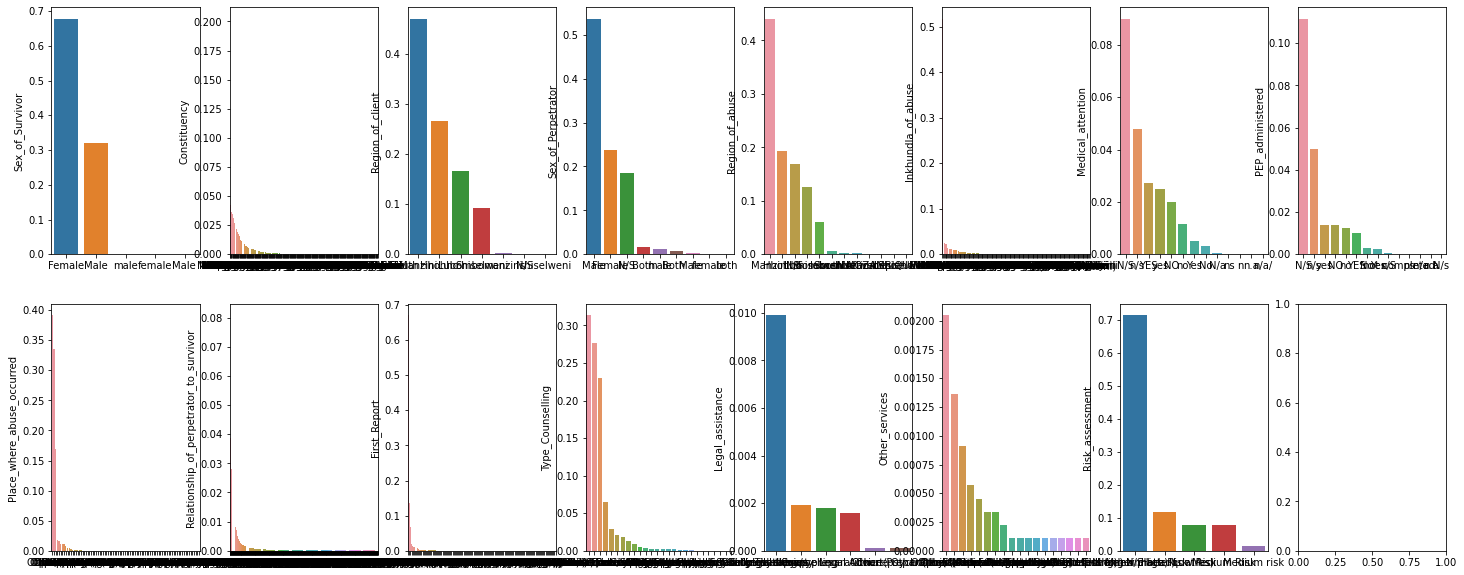

In [13]:
plot_distribution(gbv_data, interest_cols, 8, 2, (25,10))

In [14]:
# plot_distribution_of_labels(interest_cols, 8, 2, (25,10))

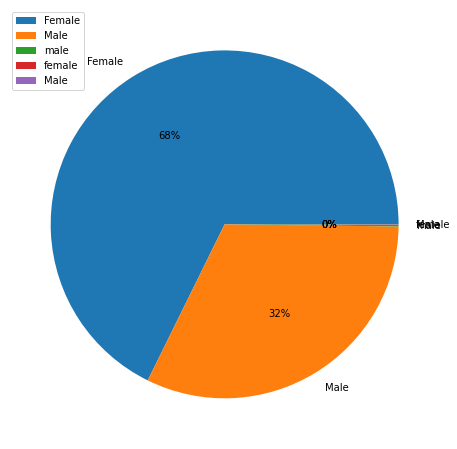

In [15]:
#visualizing the type of transaction s to see which are more like to be fraudulent
type = gbv_data['Sex_of_Survivor'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()


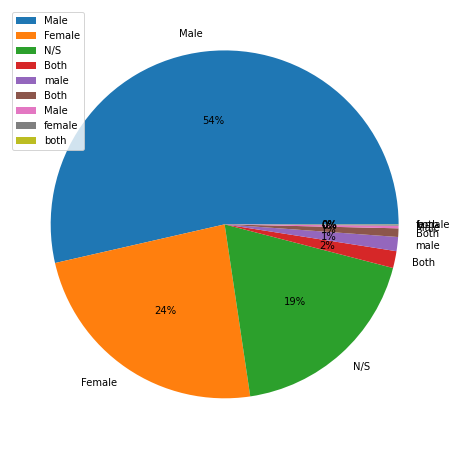

In [16]:
#visualizing the type of transaction s to see which are more like to be fraudulent
type = gbv_data['Sex_of_Perpetrator'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

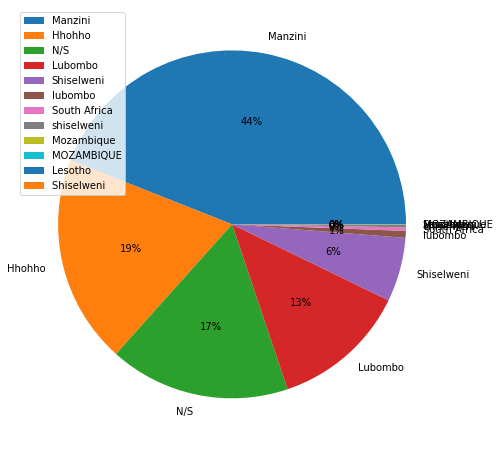

In [17]:
#visualizing the type of transaction s to see which are more like to be fraudulent
type = gbv_data['Region_of_abuse'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

## REMOVING DUPLICATE LABELS

from the exploratory data analysis above we notice that in most columns the data is spread across duplicate labels i.e Male and male are treated as diferent labels
so we solve this by eliminating the duplicate labels

In [18]:
# function to remove duplicate labels in the data columns 
def remove_duplicates(columns):
    for column in columns:
        col = []
        for i in gbv_data[column]:
            a = str(i).upper().strip()
            col.append(a)

        gbv_data[column] = col

In [19]:
# remove duplicates of interested cols
remove_duplicates(interest_cols)

In [20]:
# remove duplicates of classes cols
remove_duplicates(classes)

In [21]:
gbv_data = gbv_data.drop(columns=drop_cols, axis=1)

In [22]:
gbv_data.head()

,Sex_of_Survivor,Constituency,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Inkhundla_of_abuse,Medical_attention,PEP_administered,Place_where_abuse_occurred,Relationship_of_perpetrator_to_survivor,First_Report,Type_Counselling,Legal_assistance,Other_services,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
0,MALE,N/S,LUBOMBO,FEMALE,LUBOMBO,N/S,NAN,NAN,HOME,GIRLFRIEND,SWAGAA,ONE-ON-ONE COUNSELLING,NAN,NAN,N/S,NAN,NAN,NAN,NAN,TRUE
1,FEMALE,N/S,MANZINI,MALE,MANZINI,N/S,NAN,NAN,HOME,HUSBAND/WIFE,SWAGAA,ONE-ON-ONE COUNSELLING,NAN,NAN,N/S,NAN,NAN,NAN,NAN,TRUE
2,FEMALE,N/S,LUBOMBO,FEMALE,LUBOMBO,N/S,NAN,NAN,HOME,MOTHER,SWAGAA,CHILD COUNSELLING,NAN,NAN,N/S,NAN,NAN,NAN,NAN,TRUE
3,FEMALE,N/S,LUBOMBO,MALE,LUBOMBO,N/S,NAN,NAN,HOME,FAMILY FRIEND,SWAGAA,CHILD COUNSELLING,NAN,NAN,N/S,TRUE,NAN,NAN,NAN,NAN
4,FEMALE,N/S,LUBOMBO,MALE,LUBOMBO,N/S,NAN,NAN,OPEN FIELD,PERSON FROM NEIGHBOURHOOD,POLICE,CHILD COUNSELLING,NAN,NAN,N/S,TRUE,NAN,NAN,NAN,NAN


In [23]:
pd.DataFrame({'# of unique values' : gbv_data.nunique(), 
             "# of missing values": gbv_data.isnull().sum(),
             "# of null values": gbv_data.isna().sum(),
             "DataTypes": gbv_data.dtypes
             })

,# of unique values,# of missing values,# of null values,DataTypes
Sex_of_Survivor,2,0,0,object
Constituency,230,0,0,object
Region_of_client,5,0,0,object
Sex_of_Perpetrator,4,0,0,object
Region_of_abuse,8,0,0,object
Inkhundla_of_abuse,147,0,0,object
Medical_attention,9,0,0,object
PEP_administered,8,0,0,object
Place_where_abuse_occurred,71,0,0,object
Relationship_of_perpetrator_to_survivor,483,0,0,object


In [24]:
gbv_data.describe()

,Sex_of_Survivor,Constituency,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Inkhundla_of_abuse,Medical_attention,PEP_administered,Place_where_abuse_occurred,Relationship_of_perpetrator_to_survivor,First_Report,Type_Counselling,Legal_assistance,Other_services,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
count,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796
unique,2,230,5,4,8,147,9,8,71,483,103,16,5,19,4,2,2,3,2,2
top,FEMALE,N/S,MANZINI,MALE,MANZINI,N/S,NAN,NAN,HOME,NAN,SWAGAA,ONE-ON-ONE COUNSELLING,NAN,NAN,N/S,NAN,NAN,NAN,NAN,TRUE
freq,5958,1796,4166,4848,3870,4629,6769,6872,6394,1392,5903,2927,8660,8731,6268,7508,7654,7800,8145,5191


## CATERGORIZE DATA
by removing null data in some of the columns and standardising some of the labels in the columns

In [25]:
# function to remove replace null columns
def replace_null(columns, to_replace):
    for column in columns:
        gbv_data[column] = gbv_data[column].replace(to_replace=to_replace)

In [26]:
null_features = ['Medical_attention', 'PEP_administered', 'Legal_assistance', 'Other_services', 'Risk_assessment']
feature_replace = {'NAN':'NO', 'NS':'NO', 'N/S':'NO', 'N':'NO', 'N.A':'NO', 'N/A/':'NO', 'N/A':'NO', 'nan':'0'}
replace_null(null_features, feature_replace)

In [27]:
# check unique labels i the classes columns
print(gbv_data['Sexual'].unique())
print(gbv_data['Physical'].unique())
print(gbv_data['Financial'].unique())
print(gbv_data['Neglect'].unique())
print(gbv_data['Emotional_Verbal'].unique())

['NAN' 'TRUE']
['NAN' 'TRUE']
['NAN' 'TRUE' '']
['NAN' 'TRUE']
['TRUE' 'NAN']


In [28]:
class_replace = {'nan':'FALSE','NaN':'FALSE', 'NAN':'FALSE', ' ':'FALSE', '':'FALSE'}
replace_null(classes, class_replace)

In [29]:
# check unique labels i the classes columns
print(gbv_data['Sexual'].unique())
print(gbv_data['Physical'].unique())
print(gbv_data['Financial'].unique())
print(gbv_data['Neglect'].unique())
print(gbv_data['Emotional_Verbal'].unique())

['FALSE' 'TRUE']
['FALSE' 'TRUE']
['FALSE' 'TRUE']
['FALSE' 'TRUE']
['TRUE' 'FALSE']


In [30]:
gbv_data.head(5)

,Sex_of_Survivor,Constituency,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Inkhundla_of_abuse,Medical_attention,PEP_administered,Place_where_abuse_occurred,Relationship_of_perpetrator_to_survivor,First_Report,Type_Counselling,Legal_assistance,Other_services,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
0,MALE,N/S,LUBOMBO,FEMALE,LUBOMBO,N/S,NO,NO,HOME,GIRLFRIEND,SWAGAA,ONE-ON-ONE COUNSELLING,NO,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
1,FEMALE,N/S,MANZINI,MALE,MANZINI,N/S,NO,NO,HOME,HUSBAND/WIFE,SWAGAA,ONE-ON-ONE COUNSELLING,NO,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
2,FEMALE,N/S,LUBOMBO,FEMALE,LUBOMBO,N/S,NO,NO,HOME,MOTHER,SWAGAA,CHILD COUNSELLING,NO,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
3,FEMALE,N/S,LUBOMBO,MALE,LUBOMBO,N/S,NO,NO,HOME,FAMILY FRIEND,SWAGAA,CHILD COUNSELLING,NO,NO,NO,TRUE,FALSE,FALSE,FALSE,FALSE
4,FEMALE,N/S,LUBOMBO,MALE,LUBOMBO,N/S,NO,NO,OPEN FIELD,PERSON FROM NEIGHBOURHOOD,POLICE,CHILD COUNSELLING,NO,NO,NO,TRUE,FALSE,FALSE,FALSE,FALSE


## Visualising Abuse cases per region

<AxesSubplot:ylabel='Emotional_Verbal'>

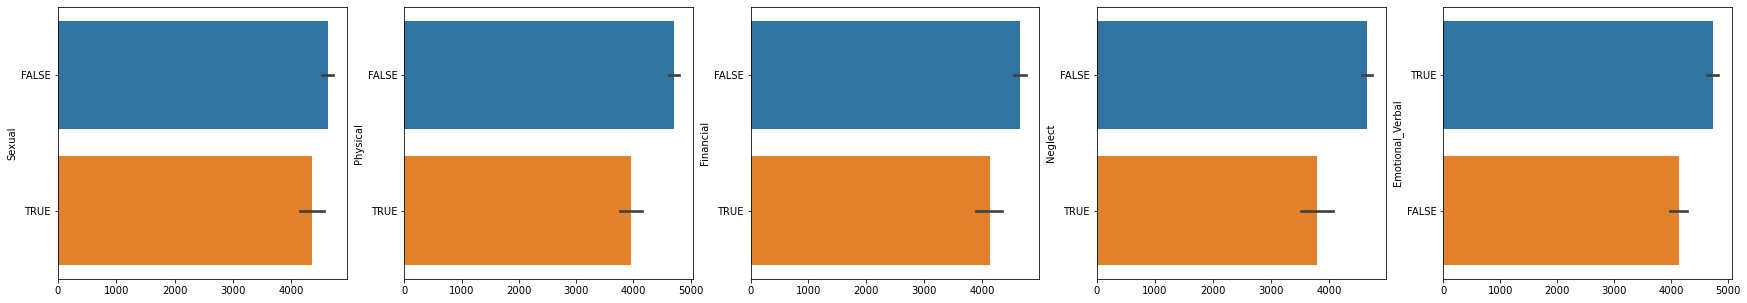

In [31]:
df = gbv_data[gbv_data['Region_of_abuse'] == 'MANZINI']
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(30,5))
sns.barplot(x = df['Sexual'].index, y = df['Sexual'], ax=ax[0])
sns.barplot(x = df['Physical'].index, y = df['Physical'], ax=ax[1])
sns.barplot(x = df['Financial'].index, y = df['Financial'], ax=ax[2])
sns.barplot(x = df['Neglect'].index, y = df['Neglect'], ax=ax[3])
sns.barplot(x = df['Emotional_Verbal'].index, y = df['Emotional_Verbal'], ax=ax[4])

<AxesSubplot:ylabel='Emotional_Verbal'>

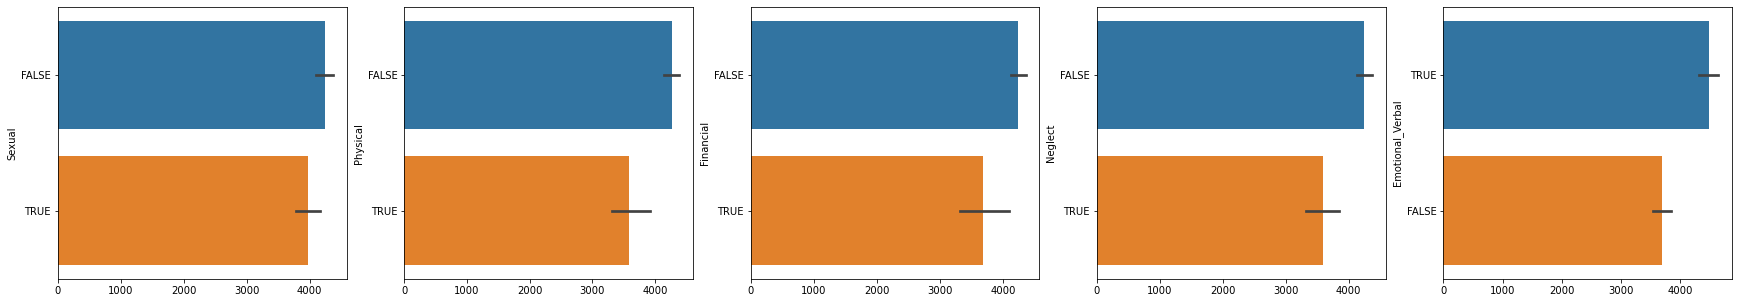

In [32]:
df = gbv_data[gbv_data['Region_of_abuse'] == 'HHOHHO']
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(30,5))
sns.barplot(x = df['Sexual'].index, y = df['Sexual'], ax=ax[0])
sns.barplot(x = df['Physical'].index, y = df['Physical'], ax=ax[1])
sns.barplot(x = df['Financial'].index, y = df['Financial'], ax=ax[2])
sns.barplot(x = df['Neglect'].index, y = df['Neglect'], ax=ax[3])
sns.barplot(x = df['Emotional_Verbal'].index, y = df['Emotional_Verbal'], ax=ax[4])

<AxesSubplot:ylabel='Emotional_Verbal'>

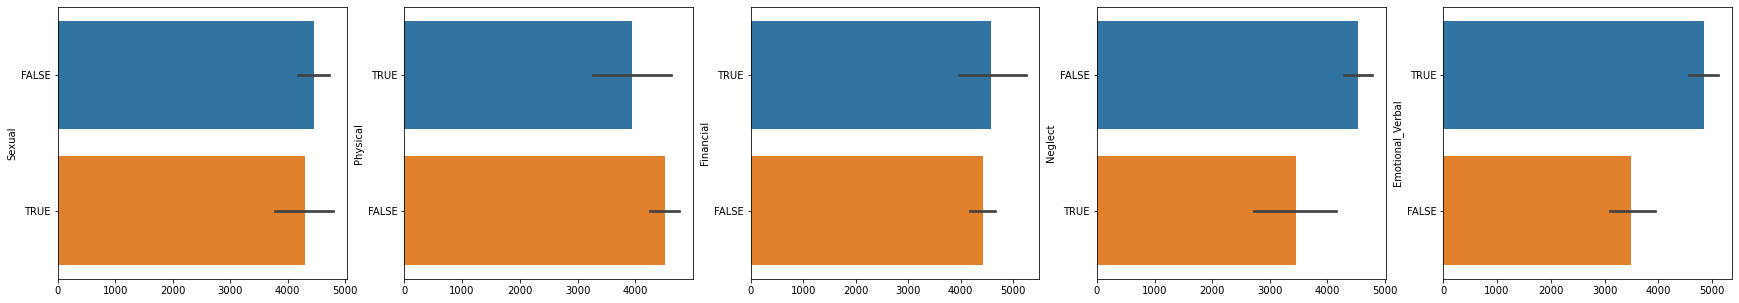

In [33]:
df = gbv_data[gbv_data['Region_of_abuse'] == 'SHISELWENI']
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(30,5))
sns.barplot(x = df['Sexual'].index, y = df['Sexual'], ax=ax[0])
sns.barplot(x = df['Physical'].index, y = df['Physical'], ax=ax[1])
sns.barplot(x = df['Financial'].index, y = df['Financial'], ax=ax[2])
sns.barplot(x = df['Neglect'].index, y = df['Neglect'], ax=ax[3])
sns.barplot(x = df['Emotional_Verbal'].index, y = df['Emotional_Verbal'], ax=ax[4])

<AxesSubplot:ylabel='Emotional_Verbal'>

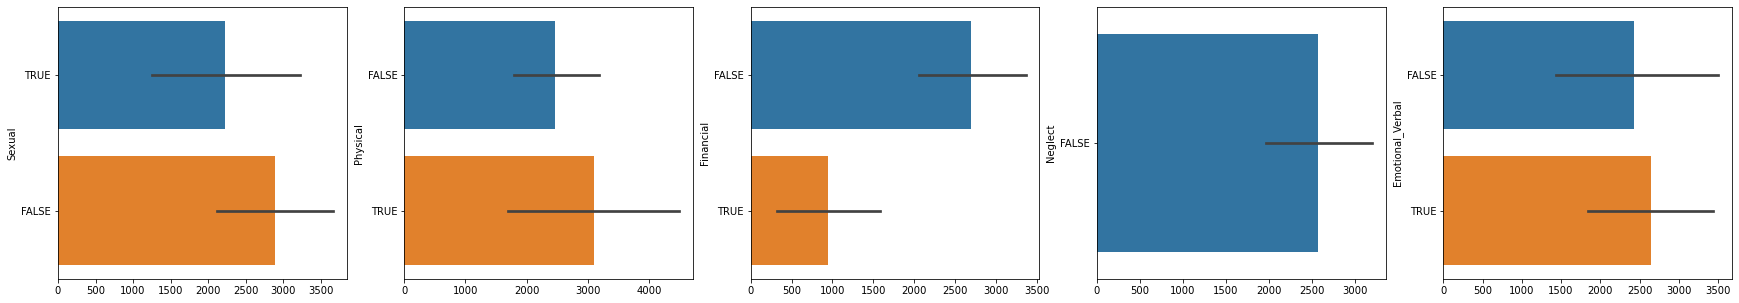

In [34]:
df = gbv_data[gbv_data['Region_of_abuse'] == 'SOUTH AFRICA']
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(30,5))
sns.barplot(x = df['Sexual'].index, y = df['Sexual'], ax=ax[0])
sns.barplot(x = df['Physical'].index, y = df['Physical'], ax=ax[1])
sns.barplot(x = df['Financial'].index, y = df['Financial'], ax=ax[2])
sns.barplot(x = df['Neglect'].index, y = df['Neglect'], ax=ax[3])
sns.barplot(x = df['Emotional_Verbal'].index, y = df['Emotional_Verbal'], ax=ax[4])

<AxesSubplot:ylabel='Emotional_Verbal'>

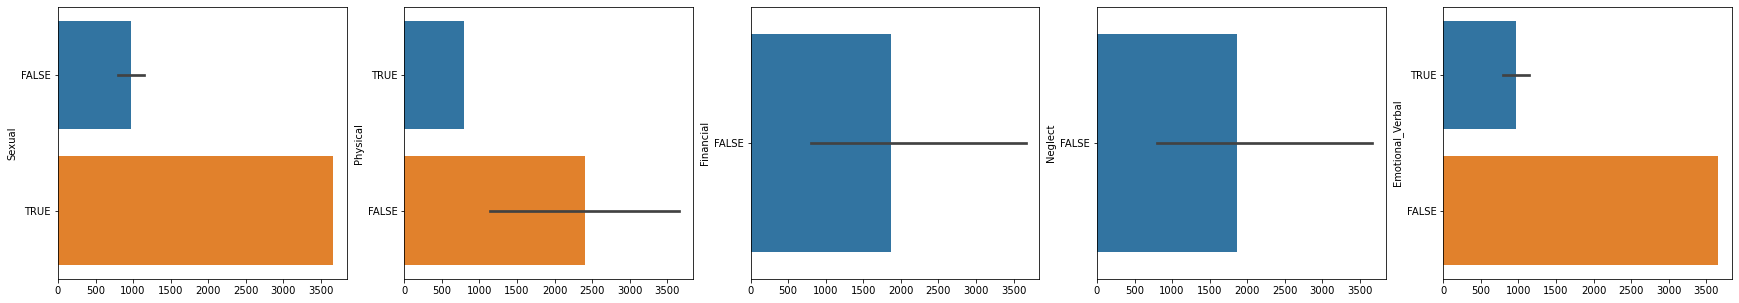

In [35]:
df = gbv_data[gbv_data['Region_of_abuse'] == 'MOZAMBIQUE']
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(30,5))
sns.barplot(x = df['Sexual'].index, y = df['Sexual'], ax=ax[0])
sns.barplot(x = df['Physical'].index, y = df['Physical'], ax=ax[1])
sns.barplot(x = df['Financial'].index, y = df['Financial'], ax=ax[2])
sns.barplot(x = df['Neglect'].index, y = df['Neglect'], ax=ax[3])
sns.barplot(x = df['Emotional_Verbal'].index, y = df['Emotional_Verbal'], ax=ax[4])

## DATA PREPROCESSING
now that the data has been cleaned we will start preprocessing it for the model training
this is mainly includes data splitting and column selection

In [36]:
# gbv_data['Violence'] = df_classes['Violence']

In [37]:
drop_cols = ['Constituency','Inkhundla_of_abuse', 'Place_where_abuse_occurred',
             'Relationship_of_perpetrator_to_survivor',
             'Other_services']
df = gbv_data.drop(columns=drop_cols, axis=1)

In [38]:
df.columns

Index(['Sex_of_Survivor', 'Region_of_client', 'Sex_of_Perpetrator',
       'Region_of_abuse', 'Medical_attention', 'PEP_administered',
       'First_Report', 'Type_Counselling', 'Legal_assistance',
       'Risk_assessment', 'Sexual', 'Physical', 'Financial', 'Neglect',
       'Emotional_Verbal'],
      dtype='object')

In [39]:
df.shape

(8796, 15)

In [40]:
df.shape

(8796, 15)

In [41]:
df.head()

,Sex_of_Survivor,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Medical_attention,PEP_administered,First_Report,Type_Counselling,Legal_assistance,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
0,MALE,LUBOMBO,FEMALE,LUBOMBO,NO,NO,SWAGAA,ONE-ON-ONE COUNSELLING,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
1,FEMALE,MANZINI,MALE,MANZINI,NO,NO,SWAGAA,ONE-ON-ONE COUNSELLING,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
2,FEMALE,LUBOMBO,FEMALE,LUBOMBO,NO,NO,SWAGAA,CHILD COUNSELLING,NO,NO,FALSE,FALSE,FALSE,FALSE,TRUE
3,FEMALE,LUBOMBO,MALE,LUBOMBO,NO,NO,SWAGAA,CHILD COUNSELLING,NO,NO,TRUE,FALSE,FALSE,FALSE,FALSE
4,FEMALE,LUBOMBO,MALE,LUBOMBO,NO,NO,POLICE,CHILD COUNSELLING,NO,NO,TRUE,FALSE,FALSE,FALSE,FALSE


In [42]:
df.dtypes

Sex_of_Survivor       object
Region_of_client      object
Sex_of_Perpetrator    object
Region_of_abuse       object
Medical_attention     object
PEP_administered      object
First_Report          object
Type_Counselling      object
Legal_assistance      object
Risk_assessment       object
Sexual                object
Physical              object
Financial             object
Neglect               object
Emotional_Verbal      object
dtype: object

In [43]:
df.dtypes

Sex_of_Survivor       object
Region_of_client      object
Sex_of_Perpetrator    object
Region_of_abuse       object
Medical_attention     object
PEP_administered      object
First_Report          object
Type_Counselling      object
Legal_assistance      object
Risk_assessment       object
Sexual                object
Physical              object
Financial             object
Neglect               object
Emotional_Verbal      object
dtype: object

## Encoding the data
because our data is mostly catergorical we need to encode it into numerical values before we train our model.
although the using a multilabel binazer seems more suitable the simple labelencoder will give us better accuracy in our models

In [44]:
# Encode the data labels to numerical values this enable us to use the data to trai the model
encoder = LabelEncoder()
df["Sex_of_Survivor"] = encoder.fit_transform(df["Sex_of_Survivor"])
df["Region_of_client"] = encoder.fit_transform(df["Region_of_client"])
df["Sex_of_Perpetrator"] = encoder.fit_transform(df["Sex_of_Perpetrator"])
df["Region_of_abuse"] = encoder.fit_transform(df["Region_of_abuse"])
df["Medical_attention"] = encoder.fit_transform(df["Medical_attention"])
df["PEP_administered"] = encoder.fit_transform(df["PEP_administered"])
df["First_Report"] = encoder.fit_transform(df["First_Report"])
df["Type_Counselling"] = encoder.fit_transform(df["Type_Counselling"])
df["Legal_assistance"] = encoder.fit_transform(df["Legal_assistance"])
df["Risk_assessment"] = encoder.fit_transform(df["Risk_assessment"])

    
df["Sexual"] = encoder.fit_transform(df["Sexual"])
df["Physical"] = encoder.fit_transform(df["Physical"])
df["Financial"] = encoder.fit_transform(df["Financial"])
df["Neglect"] = encoder.fit_transform(df["Neglect"])
df["Emotional_Verbal"] = encoder.fit_transform(df["Emotional_Verbal"])


In [45]:
df.describe()

,Sex_of_Survivor,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Medical_attention,PEP_administered,First_Report,Type_Counselling,Legal_assistance,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
count,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000
mean,0.322647,1.485789,1.899613,2.820487,0.057185,0.053774,84.452819,9.385402,1.984766,2.400409,0.146430,0.129832,0.113120,0.074011,0.590155
std,0.467515,1.155909,0.714215,1.768383,0.232209,0.323350,21.855844,6.477367,0.138192,1.047792,0.353557,0.336137,0.316757,0.261804,0.491833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,85.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,94.000000,13.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000,94.000000,15.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,4.000000,3.000000,7.000000,1.000000,2.000000,102.000000,15.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.head()

,Sex_of_Survivor,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Medical_attention,PEP_administered,First_Report,Type_Counselling,Legal_assistance,Risk_assessment,Sexual,Physical,Financial,Neglect,Emotional_Verbal
0,1,1,1,2,0,0,94,15,2,3,0,0,0,0,1
1,0,2,2,3,0,0,94,15,2,3,0,0,0,0,1
2,0,1,1,2,0,0,94,0,2,3,0,0,0,0,1
3,0,1,2,2,0,0,94,0,2,3,1,0,0,0,0
4,0,1,2,2,0,0,85,0,2,3,1,0,0,0,0


In [47]:
df.dtypes

Sex_of_Survivor       int64
Region_of_client      int64
Sex_of_Perpetrator    int64
Region_of_abuse       int64
Medical_attention     int64
PEP_administered      int64
First_Report          int64
Type_Counselling      int64
Legal_assistance      int64
Risk_assessment       int64
Sexual                int64
Physical              int64
Financial             int64
Neglect               int64
Emotional_Verbal      int64
dtype: object

## Data splitting
we need to split our data into 3 subsets to allow us to train validate and test our models


In [48]:
X = df[df.columns[:-5]]
y = df[df.columns[-5]]

In [49]:
X

,Sex_of_Survivor,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Medical_attention,PEP_administered,First_Report,Type_Counselling,Legal_assistance,Risk_assessment
0,1,1,1,2,0,0,94,15,2,3
1,0,2,2,3,0,0,94,15,2,3
2,0,1,1,2,0,0,94,0,2,3
3,0,1,2,2,0,0,94,0,2,3
4,0,1,2,2,0,0,85,0,2,3
...,...,...,...,...,...,...,...,...,...,...
8791,1,2,1,3,0,0,9,13,2,1
8792,1,2,1,3,0,0,9,13,2,0
8793,0,0,2,0,0,0,85,13,2,0
8794,0,0,2,0,1,0,85,0,2,0


In [50]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size = 0.3,random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size = 0.5, random_state=25)

print(X_train.shape)
print(y_train.shape)
print('=====================')
print(X_test.shape)
print(y_test.shape)
print('=====================')
print(X_test.shape)
print(y_test.shape)

(6157, 10)
(6157,)
(1320, 10)
(1320,)
(1320, 10)
(1320,)


In [51]:

X_train

,Sex_of_Survivor,Region_of_client,Sex_of_Perpetrator,Region_of_abuse,Medical_attention,PEP_administered,First_Report,Type_Counselling,Legal_assistance,Risk_assessment
3374,1,2,2,3,0,0,85,15,2,3
8102,0,1,2,2,0,0,85,13,2,0
3521,1,2,3,5,0,0,94,0,2,3
5515,0,2,1,3,0,0,94,13,2,3
7815,1,2,2,3,0,0,94,0,2,2
...,...,...,...,...,...,...,...,...,...,...
2895,1,0,3,5,0,0,94,0,2,3
7813,0,2,2,3,0,0,94,0,2,1
905,0,2,2,3,0,0,85,15,2,3
5192,0,2,1,0,0,0,94,0,2,3


## Model Training 
To make sure we slect a model that will give us the best results we are going to fit, train
and compare the results of two classification algorithms
1. RandomForrestClassifier
2. DecisionTreeClassifier

We are also going to train an ensemble classifier and compare the results that we get.
1. BaggingClassifier

In [52]:
# fit, train and predict using the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=5)
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

conf_mat_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1130
           1       0.68      0.43      0.53       190

    accuracy                           0.89      1320
   macro avg       0.80      0.70      0.73      1320
weighted avg       0.88      0.89      0.88      1320



<AxesSubplot:>

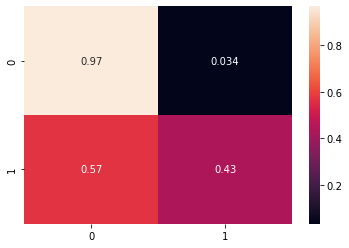

In [53]:
# Plott the confusion matrix for the random forrest classifier
sns.heatmap(conf_mat_rf, annot=True)

In [54]:
# fits, train and predict using the RandomForest Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

conf_mat_dt = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1130
           1       0.69      0.38      0.49       190

    accuracy                           0.89      1320
   macro avg       0.80      0.68      0.71      1320
weighted avg       0.87      0.89      0.87      1320



<AxesSubplot:>

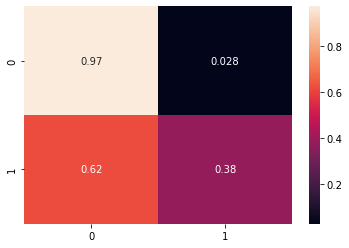

In [55]:
# plot confusion matrix for the Decision tree classifier
sns.heatmap(conf_mat_dt, annot=True)

In [56]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [59]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
model.fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)

y_pred = model.predict(X_test)

conf_mat_bag = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))

[0.8961039  0.91558442 0.88474026 0.90584416 0.88636364 0.91233766
 0.89123377 0.90081301 0.88130081 0.88780488]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1130
           1       0.73      0.39      0.51       190

    accuracy                           0.89      1320
   macro avg       0.82      0.68      0.72      1320
weighted avg       0.88      0.89      0.88      1320



<AxesSubplot:>

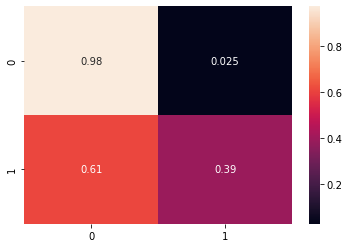

In [60]:
# plot confusion matrix for the Decision tree classifier
sns.heatmap(conf_mat_bag, annot=True)